<a href="https://colab.research.google.com/github/MartaSolarz/Data_science_theory/blob/main/02_pandas/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Pandas
>Strona biblioteki: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
>Dokumentacja: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
>
>Podstawowa biblioteka do analizy danych w języku Python.
>
>Aby zainstalować bibliotekę Pandas użyj polecenia poniżej:
```
pip install pandas
```
### Spis treści:
1. [Import Bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Eksploracja danych](#a3)
4. [Selekcja kolumn](#a4)
5. [Selekcja wierszy](#a5)
6. [Obliczanie nowych kolumn](#a6)
7. [Filtrowanie danych](#a7)


 







### <a name='a1'></a> Import Bibliotek

In [1]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.21.6
Pandas: 1.3.5


### <a name='a2'></a> Załadowanie danych

In [2]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()    

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2022-08-22 to 2017-08-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


### <a name='a3'></a> Eksploracja danych

In [4]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-22,135.720,136.3200,132.8500,133.2200,50461504
2022-08-19,140.470,141.1100,137.9142,138.2300,47792843
2022-08-18,141.320,142.7700,140.3800,142.3000,37458737
2022-08-17,142.690,143.3800,140.7800,142.1000,48149778
2022-08-16,143.905,146.5700,142.0000,144.7800,59102859
...,...,...,...,...,...
2017-08-30,47.922,48.4705,47.8453,48.3795,57962960
2017-08-29,47.000,47.8000,46.8165,47.7030,57435780
2017-08-28,47.327,47.6500,47.1125,47.3010,51608020


In [5]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-22,135.720,136.32,132.8500,133.22,50461504
2022-08-19,140.470,141.11,137.9142,138.23,47792843
2022-08-18,141.320,142.77,140.3800,142.30,37458737
2022-08-17,142.690,143.38,140.7800,142.10,48149778
2022-08-16,143.905,146.57,142.0000,144.78,59102859


In [6]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-22,135.72,136.32,132.8500,133.22,50461504
2022-08-19,140.47,141.11,137.9142,138.23,47792843
2022-08-18,141.32,142.77,140.3800,142.30,37458737


In [7]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-08-30,47.922,48.4705,47.8453,48.3795,57962960
2017-08-29,47.000,47.8000,46.8165,47.7030,57435780
2017-08-28,47.327,47.6500,47.1125,47.3010,51608020
2017-08-25,47.800,47.8810,47.2050,47.2630,66369080
2017-08-24,47.871,47.9500,47.0570,47.6225,103856440


In [8]:
df.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2017-09-07,48.700,49.0295,48.6275,48.9735,51251340
2017-09-06,48.416,48.5920,48.0300,48.3900,42514060
2017-09-05,48.770,48.8385,48.0185,48.2635,59933800
2017-09-01,49.210,49.2250,48.8438,48.9125,50679500
2017-08-31,48.735,49.0500,48.6380,49.0300,66540860
2017-08-30,47.922,48.4705,47.8453,48.3795,57962960
2017-08-29,47.000,47.8000,46.8165,47.7030,57435780
2017-08-28,47.327,47.6500,47.1125,47.3010,51608020
2017-08-25,47.800,47.8810,47.2050,47.2630,66369080


In [9]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [10]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2022-08-22,135.720,136.32,132.8500,133.22,50461504
2022-08-19,140.470,141.11,137.9142,138.23,47792843
2022-08-18,141.320,142.77,140.3800,142.30,37458737
2022-08-17,142.690,143.38,140.7800,142.10,48149778
2022-08-16,143.905,146.57,142.0000,144.78,59102859


In [11]:
df.describe()

,open,high,low,close,volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,116.074601,117.420238,114.585075,116.018378,8.623540e+07
std,39.323464,39.788598,38.790356,39.246342,4.110496e+07
min,47.000000,47.431500,46.587500,46.930000,1.762674e+07
25%,86.198000,87.094500,85.019500,86.189500,5.851188e+07
50%,100.000000,100.734000,99.101500,99.879500,7.459956e+07
75%,158.338000,159.938000,156.250000,158.100000,1.022881e+08
max,187.200000,188.654000,184.840000,186.570000,3.310520e+08


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1257.0,1.160746e+02,3.932346e+01,4.700000e+01,8.619800e+01,1.000000e+02,1.583380e+02,1.872000e+02
high,1257.0,1.174202e+02,3.978860e+01,4.743150e+01,8.709450e+01,1.007340e+02,1.599380e+02,1.886540e+02
low,1257.0,1.145851e+02,3.879036e+01,4.658750e+01,8.501950e+01,9.910150e+01,1.562500e+02,1.848400e+02
close,1257.0,1.160184e+02,3.924634e+01,4.693000e+01,8.618950e+01,9.987950e+01,1.581000e+02,1.865700e+02
volume,1257.0,8.623540e+07,4.110496e+07,1.762674e+07,5.851188e+07,7.459956e+07,1.022881e+08,3.310520e+08


### <a name='a4'></a> Selekcja kolumn

In [13]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2022-08-22,135.720,136.3200,132.8500,133.22,50461504
2022-08-19,140.470,141.1100,137.9142,138.23,47792843
2022-08-18,141.320,142.7700,140.3800,142.30,37458737
2022-08-17,142.690,143.3800,140.7800,142.10,48149778
2022-08-16,143.905,146.5700,142.0000,144.78,59102859
2022-08-15,142.800,143.7600,141.4900,143.18,39014583
2022-08-12,142.050,143.5700,140.1201,143.55,47643484
2022-08-11,143.860,144.4900,139.7600,140.64,44867336
2022-08-10,142.900,144.6000,141.0100,142.69,54773819


In [14]:
df['open']

Date
2022-08-22    135.720
2022-08-19    140.470
2022-08-18    141.320
2022-08-17    142.690
2022-08-16    143.905
2022-08-15    142.800
2022-08-12    142.050
2022-08-11    143.860
2022-08-10    142.900
2022-08-09    138.052
Name: open, dtype: float64

In [15]:
df.open

Date
2022-08-22    135.720
2022-08-19    140.470
2022-08-18    141.320
2022-08-17    142.690
2022-08-16    143.905
2022-08-15    142.800
2022-08-12    142.050
2022-08-11    143.860
2022-08-10    142.900
2022-08-09    138.052
Name: open, dtype: float64

In [16]:
df[['open']] # dostajemy dataframe

,open
Date,
2022-08-22,135.720
2022-08-19,140.470
2022-08-18,141.320
2022-08-17,142.690
2022-08-16,143.905
2022-08-15,142.800
2022-08-12,142.050
2022-08-11,143.860
2022-08-10,142.900


In [17]:
df[['open', 'close']]

,open,close
Date,,
2022-08-22,135.720,133.22
2022-08-19,140.470,138.23
2022-08-18,141.320,142.30
2022-08-17,142.690,142.10
2022-08-16,143.905,144.78
2022-08-15,142.800,143.18
2022-08-12,142.050,143.55
2022-08-11,143.860,140.64
2022-08-10,142.900,142.69


In [18]:
df.iloc[:, 0]

Date
2022-08-22    135.720
2022-08-19    140.470
2022-08-18    141.320
2022-08-17    142.690
2022-08-16    143.905
2022-08-15    142.800
2022-08-12    142.050
2022-08-11    143.860
2022-08-10    142.900
2022-08-09    138.052
Name: open, dtype: float64

In [19]:
df.iloc[:, [0, 3]]

,open,close
Date,,
2022-08-22,135.720,133.22
2022-08-19,140.470,138.23
2022-08-18,141.320,142.30
2022-08-17,142.690,142.10
2022-08-16,143.905,144.78
2022-08-15,142.800,143.18
2022-08-12,142.050,143.55
2022-08-11,143.860,140.64
2022-08-10,142.900,142.69


In [20]:
df.iloc[:, 3:5]

,close,volume
Date,,
2022-08-22,133.22,50461504
2022-08-19,138.23,47792843
2022-08-18,142.30,37458737
2022-08-17,142.10,48149778
2022-08-16,144.78,59102859
2022-08-15,143.18,39014583
2022-08-12,143.55,47643484
2022-08-11,140.64,44867336
2022-08-10,142.69,54773819


In [21]:
df.iloc[:, -1]

Date
2022-08-22    50461504
2022-08-19    47792843
2022-08-18    37458737
2022-08-17    48149778
2022-08-16    59102859
2022-08-15    39014583
2022-08-12    47643484
2022-08-11    44867336
2022-08-10    54773819
2022-08-09    40434715
Name: volume, dtype: int64

In [22]:
df.iloc[:, [-1]]

,volume
Date,
2022-08-22,50461504
2022-08-19,47792843
2022-08-18,37458737
2022-08-17,48149778
2022-08-16,59102859
2022-08-15,39014583
2022-08-12,47643484
2022-08-11,44867336
2022-08-10,54773819


In [23]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2022-08-22,132.8500,133.22,50461504
2022-08-19,137.9142,138.23,47792843
2022-08-18,140.3800,142.30,37458737
2022-08-17,140.7800,142.10,48149778
2022-08-16,142.0000,144.78,59102859
2022-08-15,141.4900,143.18,39014583
2022-08-12,140.1201,143.55,47643484
2022-08-11,139.7600,140.64,44867336
2022-08-10,141.0100,142.69,54773819


### <a name='a5'></a>  Selekcja wierszy

In [24]:
df

,open,high,low,close,volume
Date,,,,,
2022-08-22,135.720,136.3200,132.8500,133.22,50461504
2022-08-19,140.470,141.1100,137.9142,138.23,47792843
2022-08-18,141.320,142.7700,140.3800,142.30,37458737
2022-08-17,142.690,143.3800,140.7800,142.10,48149778
2022-08-16,143.905,146.5700,142.0000,144.78,59102859
2022-08-15,142.800,143.7600,141.4900,143.18,39014583
2022-08-12,142.050,143.5700,140.1201,143.55,47643484
2022-08-11,143.860,144.4900,139.7600,140.64,44867336
2022-08-10,142.900,144.6000,141.0100,142.69,54773819


In [25]:
df.iloc[0]

open           135.72
high           136.32
low            132.85
close          133.22
volume    50461504.00
Name: 2022-08-22 00:00:00, dtype: float64

In [26]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2022-08-22,135.72,136.32,132.8500,133.22,50461504
2022-08-19,140.47,141.11,137.9142,138.23,47792843
2022-08-18,141.32,142.77,140.3800,142.30,37458737


In [27]:
df

,open,high,low,close,volume
Date,,,,,
2022-08-22,135.720,136.3200,132.8500,133.22,50461504
2022-08-19,140.470,141.1100,137.9142,138.23,47792843
2022-08-18,141.320,142.7700,140.3800,142.30,37458737
2022-08-17,142.690,143.3800,140.7800,142.10,48149778
2022-08-16,143.905,146.5700,142.0000,144.78,59102859
2022-08-15,142.800,143.7600,141.4900,143.18,39014583
2022-08-12,142.050,143.5700,140.1201,143.55,47643484
2022-08-11,143.860,144.4900,139.7600,140.64,44867336
2022-08-10,142.900,144.6000,141.0100,142.69,54773819


In [30]:
df.loc['2022-08-10': '2022-08-12']

,open,high,low,close,volume
Date,,,,,
2022-08-12,142.05,143.57,140.1201,143.55,47643484
2022-08-11,143.86,144.49,139.7600,140.64,44867336


### <a name='a6'></a> Obliczanie nowych kolumn

In [42]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 828 entries, 2022-08-22 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    828 non-null    float64
 1   High    828 non-null    float64
 2   Low     828 non-null    float64
 3   Close   828 non-null    float64
 4   Volume  828 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 38.8 KB


In [43]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-22,28.34,28.805,27.87,28.00,20233070
2022-08-19,29.50,29.570,28.63,29.01,24180912
2022-08-18,30.56,30.620,29.86,30.15,20831615
2022-08-17,31.65,31.710,30.44,30.72,24239351
2022-08-16,32.08,32.725,31.33,32.38,28072342


In [44]:
df.describe()

,Open,High,Low,Close,Volume
count,828.000000,828.000000,828.000000,828.000000,8.280000e+02
mean,38.512540,39.292193,37.631754,38.457391,2.570605e+07
std,9.818008,9.887040,9.684160,9.764423,1.698635e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,31.405000,32.228750,30.718600,31.410000,1.544066e+07
50%,36.645000,37.410000,35.945000,36.690000,2.192225e+07
75%,45.330000,46.101250,44.320825,45.165000,3.132735e+07
max,63.250000,64.050000,60.800000,63.180000,1.863225e+08


In [45]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-22,28.34,28.805,27.87,28.00,20233070
2022-08-19,29.50,29.570,28.63,29.01,24180912
2022-08-18,30.56,30.620,29.86,30.15,20831615


In [46]:
df['Average'] = (df.Open + df.Close) / 2.0
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2022-08-22,28.34,28.805,27.87,28.00,20233070,28.170
2022-08-19,29.50,29.570,28.63,29.01,24180912,29.255
2022-08-18,30.56,30.620,29.86,30.15,20831615,30.355
2022-08-17,31.65,31.710,30.44,30.72,24239351,31.185
2022-08-16,32.08,32.725,31.33,32.38,28072342,32.230


In [47]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [48]:
df['Close_shift'] = df.Close.shift(1) # przesunięcie danych o jeden wiersz
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [50]:
df['Daily Change'] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change,Daily Change
Date,,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414,0.041414


In [51]:
del df['Daily Change']

In [52]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [53]:
df.Daily_Change.min()

-0.21628767847699626

In [54]:
df.Daily_Change.max()

0.3825910931174088

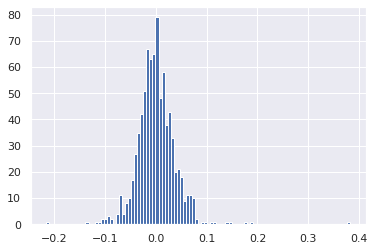

In [55]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

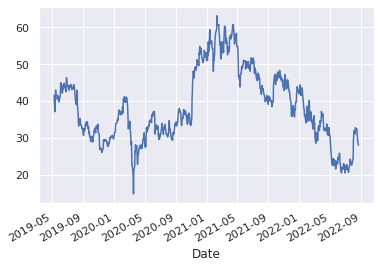

In [56]:
df.Close.plot()

### <a name='a7'></a> Filtrowanie danych

In [57]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.25,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2022-08-16,32.08,32.725,31.33,32.38,28072342,32.230,32.49,-0.003386
2022-08-17,31.65,31.710,30.44,30.72,24239351,31.185,32.38,-0.051266
2022-08-18,30.56,30.620,29.86,30.15,20831615,30.355,30.72,-0.018555


In [58]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.57,39.41,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2022-08-04,29.78,32.23,29.60,31.85,55573597,30.815,30.19,0.054985
2022-08-05,31.20,32.63,31.04,32.01,39963623,31.605,31.85,0.005024
2022-08-10,32.44,33.19,32.23,32.80,31318068,32.620,31.06,0.056021


In [59]:
df_positive.Daily_Change.mean()

0.028210979148756945

In [60]:
 df_negative = df[df.Daily_Change < 0]
 df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-13,38.79,39.240,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-17,41.98,43.290,41.27,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.680,39.46,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.240,41.25,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.280,40.50,41.25,9089469,41.150,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2022-08-16,32.08,32.725,31.33,32.38,28072342,32.230,32.49,-0.003386
2022-08-17,31.65,31.710,30.44,30.72,24239351,31.185,32.38,-0.051266
2022-08-18,30.56,30.620,29.86,30.15,20831615,30.355,30.72,-0.018555


In [61]:
 df_negative.Daily_Change.mean()

-0.025573427095800932

In [62]:
df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2022-08-16    False
2022-08-17    False
2022-08-18    False
2022-08-19    False
2022-08-22    False
Length: 828, dtype: bool

In [63]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,0.012780


In [64]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-0.040452
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-0.017112


In [65]:
df.index > '2019-11-01'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,

In [66]:
df[df.index > '2019-11-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-04,31.45,31.750,30.120,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.300,27.970,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.550,25.580,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.420,26.450,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.620,26.915,27.01,45263118,27.245,27.38,-0.013514
...,...,...,...,...,...,...,...,...
2022-08-16,32.08,32.725,31.330,32.38,28072342,32.230,32.49,-0.003386
2022-08-17,31.65,31.710,30.440,30.72,24239351,31.185,32.38,-0.051266
2022-08-18,30.56,30.620,29.860,30.15,20831615,30.355,30.72,-0.018555


In [67]:
df[(df.index >= '2019-11-01') & (df.index < '2019-11-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.410,31.50,-0.004127
2019-11-04,31.45,31.75,30.1200,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.30,27.9700,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.55,25.5800,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.62,26.9150,27.01,45263118,27.245,27.38,-0.013514
2019-11-11,27.03,27.21,26.2300,27.14,41445732,27.085,27.01,0.004813
2019-11-12,27.38,27.66,26.6600,26.70,37095389,27.040,27.14,-0.016212
2019-11-13,26.47,26.82,26.1400,26.71,34512663,26.590,26.70,0.000375


In [68]:
df[(df.index == '2019-11-01') | (df.index == '2019-11-07')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.41,31.50,-0.004127
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.09,26.94,0.016333


In [69]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.25,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2022-08-16,32.08,32.725,31.33,32.38,28072342,32.230,32.49,-0.003386
2022-08-17,31.65,31.710,30.44,30.72,24239351,31.185,32.38,-0.051266
2022-08-18,30.56,30.620,29.86,30.15,20831615,30.355,30.72,-0.018555


In [70]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2022-05-24,23.69,23.740,21.410,21.55,40726064,22.620,23.78,-0.093776
2022-05-25,21.71,22.355,21.275,22.04,31270767,21.875,21.55,0.022738
2022-05-26,22.15,23.280,21.925,23.10,30199398,22.625,22.04,0.048094


In [71]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-07-01,46.980,47.0400,44.0600,44.27,17739998,45.6250,46.38,-0.045494
2019-08-01,42.140,42.5355,41.0000,41.31,7349740,41.7250,42.14,-0.019696
2019-10-01,30.370,30.5100,28.6500,29.15,13448055,29.7600,30.47,-0.043321
2019-11-01,31.450,31.7000,30.7412,31.37,10460430,31.4100,31.50,-0.004127
2020-04-01,26.500,26.7670,24.8101,25.42,38538381,25.9600,27.92,-0.089542
2020-05-01,29.130,29.7200,28.3250,28.39,19290192,28.7600,30.27,-0.062108
2020-06-01,35.640,36.3900,35.1600,35.82,21893806,35.7300,36.32,-0.013767
2020-07-01,30.960,31.2650,30.1622,30.43,13611544,30.6950,31.08,-0.020914
2020-09-01,33.450,34.5100,33.1450,34.30,16026170,33.8750,33.63,0.019923
